# Network Properties

## Plan

- Load data from a known good exp mouse and a no context mouse
- Calculate node-wide and network-wide metrics
- Identify putitive metrics which vary

In [27]:
from context_analysis.load import load_spike_proba
from context_analysis.onep.preprocessing import align_to_block
from context_analysis.onep.reshape import pivot
from onep.distance import pairwise_correlation
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def load(session_name, exp_mouse, no_shock_mouse):
    proba = load_spike_proba(experiment="pfc", session_names=[session_name])
    proba = align_to_block(proba, session_name).dropna()
    exp = proba.loc[lambda x: x.mouse == exp_mouse].copy()
    no_shock = proba.loc[lambda x: x.mouse == no_shock_mouse].copy()
    return exp, no_shock

In [250]:
test1_exp_mouse = "B51618"
test1_no_shock = "B58216"
session_name = "day4-test1"

exp, no_shock = load(session_name, test1_exp_mouse, test1_no_shock)

In [251]:
first_block = exp.loc[lambda x: x.bin_idx == 4]

In [252]:
corr = pairwise_correlation(first_block, norm_method=None)

In [253]:
links = corr.loc[lambda x: x.value > 0.2]
G = nx.from_pandas_edgelist(links, "neuron_1", "neuron_2")

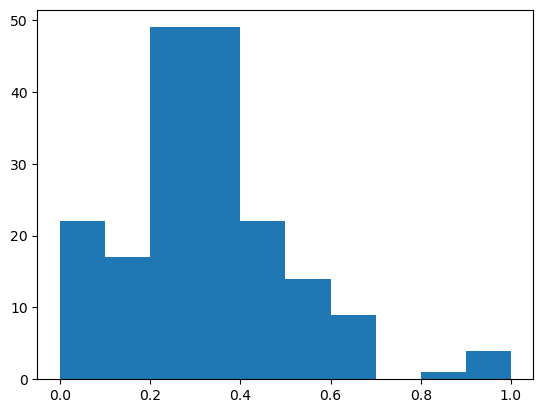

In [254]:
values = [v for v in nx.clustering(G).values()]
plt.hist(values)
plt.show()

In [255]:
first_block = exp.loc[lambda x: x.bin_idx == 5]
corr = pairwise_correlation(first_block, norm_method=None)

links = corr.loc[lambda x: x.value > 0.2]
G = nx.from_pandas_edgelist(links, "neuron_1", "neuron_2")

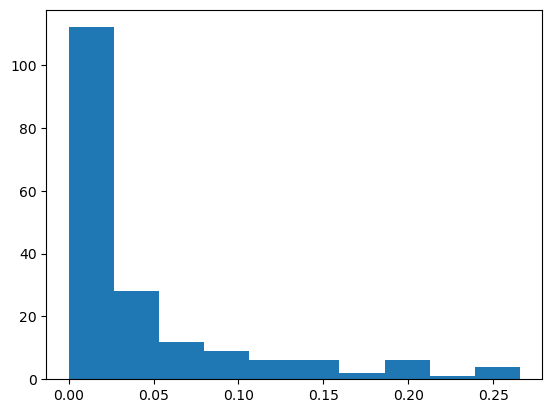

In [256]:
values = [v for v in nx.eigenvector_centrality(G).values()]
plt.hist(values)
plt.show()

In [ ]:
def get_graph_metric(df, graph_function, corr_thresh=0.2, gaussian_sigma=None, norm_method=None):
    G = make_graph(df, corr_thresh=0.2, gaussian_sigma=None, norm_method=None)
    res = graph_function(G)
    return res
    
def make_graph(df, corr_thresh=0.2, gaussian_sigma=None, norm_method=None):
    corr = pairwise_correlation(df, norm_method=norm_method, gaussian_sigma=gaussian_sigma)
    links = corr.loc[lambda x: x.value >= corr_thresh]
    G = nx.from_pandas_edgelist(links, "neuron_1", "neuron_2")
    return G